In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
dataset = pd.read_csv('dataset.csv', encoding = 'Windows-1251', index_col = 0, parse_dates = True)

In [193]:
stops = pd.read_csv('stops.csv', index_col = 0, parse_dates = True, date_format=lambda x: pd.to_datetime(x, format='%d.%m.%y %H:%M'))

# 1. Анализ промышленных данных процесса экструзии полипропилена

## 1.1. Описание предметной области и исходных данных

### 1.1.1. Технологический процесс

В качестве объекта исследования выбран процесс экструзии и гранулирования полипропилена — ключевой этап производства полимерных материалов. Технологическая цепочка включает: подачу полимерного порошка, пластификацию и гомогенизацию в цилиндрах экструдера, выдавливание расплава через фильеру, резку охлаждаемых нитей на гранулы.

### 1.1.2. Источник и структура датасета

Исходный датасет представляет собой временные ряды, сформированные системой сбора данных SCADA за период с 01.01.2017 по 26.06.2017. Общий объем данных — 1,5 млн. записей с временной меткой, 43 признака (технологических параметра). Данные имеют неравномерную временную разметку (от 1 до 10 секунд) и содержат пропуски (от 0,3% до 5% в зависимости от канала). Память датасета составляет ≈511 МБ.

Система именования параметров соответствует внутренним стандартам предприятия и имеет иерархическую структуру: [КодАппарата].[ТехнологическийПараметр].[Дополнение]...[КодДатчика]. Для декомпозиции предметной области выполнена классификация всех признаков по функциональным группам </br>
1. Сила тока электродвигателей; </br>
2. Частота вращения электродвигателей;</br>
3. Температура полипропилена на разных участках цилиндра;</br>
4. Внешние температуры цилиндра;</br>
5. Температура щелевого диска;</br>
6. Температура охлаждающей воды;</br>
7. Положение ножей;</br>
8. Расход подачи порошка полипропилена;</br>
9. Давление расплава до и после сит, до фильеры.

In [194]:
dataset = dataset.reset_index()
dataset.head(5)

,date,RF.21304.Ток...213MII904A,S.C.ВПУСК.ПП.ДАВЛ...214PI226AA,S.C.ВПУСК.ПП.ДАВЛ...214PI226AB,S.C.ВПУСК.ПП.ТЕМП...214TI232A,SPEED.CONTROLLER...250MSIC001.PV,XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV,ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A,ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981,Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A,...,ЦИЛ..3.ТЕМП.УПР...214TIC207A,ЦИЛ..4.ТЕМП.УПР...214TIC208A,ЦИЛ..5.ТЕМП.УПР...214TIC209A,ЦИЛ..6.ТЕМП.УПР...214TIC210A,ЦИЛ..7.ТЕМП.УПР...214TIC211A,ЦИЛ..8.ТЕМП.УПР...214TIC212A,ЦИЛ..9.ТЕМП.УПР...214TIC213A,ЭКСТР.ДВИГ.ВЛАСТЬ...214JI200A,ЭКСТР.ДВИГ.ПОТОК...214II200A,H2.C3..КОНТР.СООТН...212AIC008.PV
0,2017-01-01 00:00:10,NaN,14.880000,14.860000,256.100006,0.0,NaN,0.5277,NaN,52.0,...,153.300003,240.100006,234.900009,225.0,220.0,220.300003,220.100006,5890.0,NaN,NaN
1,2017-01-01 00:00:20,NaN,14.880000,14.839999,256.000000,0.0,NaN,0.5277,NaN,52.0,...,153.300003,240.199997,234.900009,225.0,220.0,220.300003,220.100006,5890.0,NaN,NaN
2,2017-01-01 00:00:30,NaN,14.870000,14.820000,256.000000,0.0,NaN,0.5277,NaN,52.0,...,153.400009,240.199997,234.900009,225.0,220.0,220.300003,220.100006,5890.0,NaN,NaN
3,2017-01-01 00:00:40,NaN,14.889999,14.870000,256.100006,0.0,NaN,0.5277,NaN,52.0,...,153.400009,240.199997,234.900009,225.0,220.0,220.300003,220.100006,5890.0,NaN,NaN
4,2017-01-01 00:00:50,NaN,14.880000,14.830000,256.100006,0.0,NaN,0.5277,NaN,52.0,...,153.400009,240.199997,234.900009,225.0,220.0,220.300003,220.100006,5890.0,NaN,NaN


In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521798 entries, 0 to 1521797
Data columns (total 44 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   date                                     1521798 non-null  datetime64[ns]
 1   RF.21304.Ток...213MII904A                1444039 non-null  float64       
 2   S.C.ВПУСК.ПП.ДАВЛ...214PI226AA           1521798 non-null  float64       
 3   S.C.ВПУСК.ПП.ДАВЛ...214PI226AB           1521798 non-null  float64       
 4   S.C.ВПУСК.ПП.ТЕМП...214TI232A            1521798 non-null  float64       
 5   SPEED.CONTROLLER...250MSIC001.PV         1517478 non-null  float64       
 6   XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV  1444039 non-null  float64       
 7   ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A           1521798 non-null  float64       
 8   ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981       1444039 non-null  float64       
 9   Е.21402А....Г

Помимо данных технологических параметров, в работе использован дополнительный датасет, фиксирующий события остановок и технологических перерывов в работе линии экструзии полипропилена. Данный датасет формируется оперативным персоналом вручную через интерфейс АСУ ТП и содержит следующие атрибуты:</br>
Временная метка (date) — точное время регистрации события в формате ДД.ММ.ГГ ЧЧ:ММ;</br>
Тип события (type) — категория остановки, где:</br>
stop — полная аварийная остановка линии;</br>
vibrosito — остановка на вибросито (технологическая остановка для обслуживания);</br>
Объем и периодичность: Датсет содержит 66 записей событий за период с января 2017 по апрель 2018 года.</br>


In [196]:
stops.head(10)

,type
date,
11.1.17 11:03,stop
30.1.17 8:51,stop
24.2.17 17:45,stop
7.3.17 0:16,stop
8.3.17 11:23,vibrosito
8.3.17 15:56,vibrosito
10.3.17 17:55,stop
31.3.17 1:42,vibrosito
1.4.17 7:45,stop


In [197]:
stops.type.unique()

array(['stop', 'vibrosito'], dtype=object)

## 1.2. Объединение данных датчиков и событий остановок

Для создания единого набора данных были объединены два источника:

1. Данные телеметрии с датчиков оборудования
2. Логи событий остановок экструдера

In [198]:
stops = stops.reset_index()

stops.info

<bound method DataFrame.info of              date       type
0   11.1.17 11:03       stop
1    30.1.17 8:51       stop
2   24.2.17 17:45       stop
3     7.3.17 0:16       stop
4    8.3.17 11:23  vibrosito
..            ...        ...
61    6.2.18 7:46  vibrosito
62   15.2.18 2:47  vibrosito
63  15.2.18 11:16  vibrosito
64   3.3.18 21:45  vibrosito
65   2.4.18 18:45  vibrosito

[66 rows x 2 columns]>

In [199]:
# соединяем два датасета по дате и
# получаем датасет с новой колонкой, содержащей метку "1"(была остановка)/"0"(не было остановки)

d = {'vibrosito' : 1, 'stop' : 1}
stops = stops.replace({'type': d})
stops.date = pd.to_datetime(stops.date)
result = pd.merge(dataset, stops, how='left', on='date')
result.type = result.type.fillna(0)

/var/folders/bb/l0jr57jj6rz13_wgjj4ybh940000gn/T/ipykernel_2519/3026214620.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stops = stops.replace({'type': d})
/var/folders/bb/l0jr57jj6rz13_wgjj4ybh940000gn/T/ipykernel_2519/3026214620.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stops.date = pd.to_datetime(stops.date)


In [200]:
result.shape

(1521798, 45)

## 1.3. Анализ пропусков

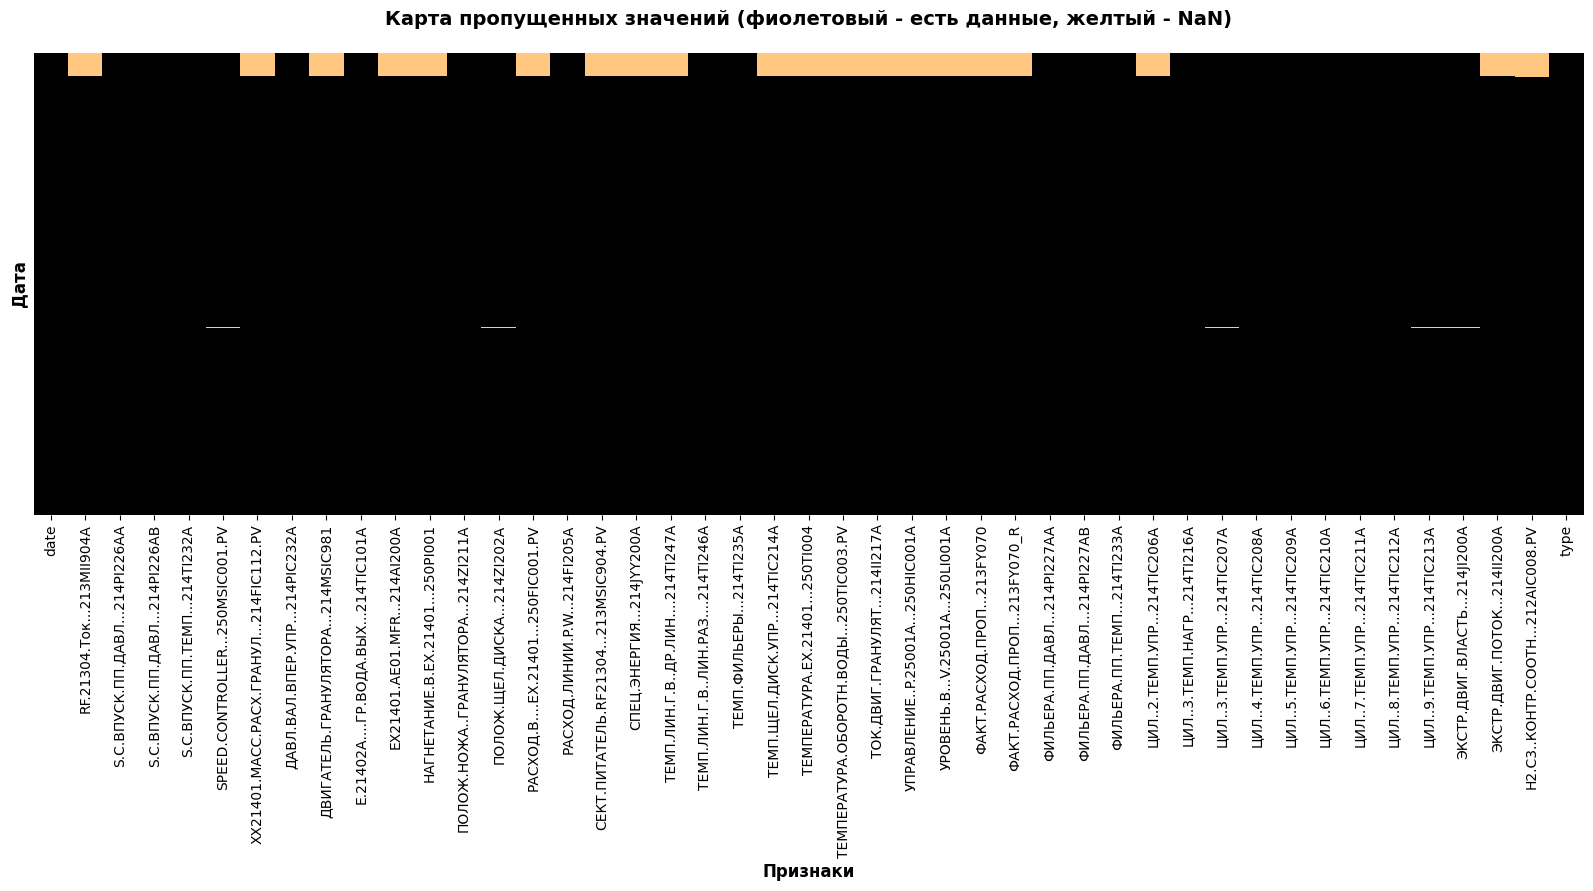

In [201]:
plt.figure(figsize=(20, 6))
sns.heatmap(result.isnull(), cbar=False, cmap='copper', yticklabels=False)
plt.title('Карта пропущенных значений (фиолетовый - есть данные, желтый - NaN)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Признаки', fontsize=12, fontweight='bold')
plt.ylabel('Дата', fontsize=12, fontweight='bold')
plt.show()

In [202]:
result.isnull().sum()

date                                           0
RF.21304.Ток...213MII904A                  77759
S.C.ВПУСК.ПП.ДАВЛ...214PI226AA                 0
S.C.ВПУСК.ПП.ДАВЛ...214PI226AB                 0
S.C.ВПУСК.ПП.ТЕМП...214TI232A                  0
SPEED.CONTROLLER...250MSIC001.PV            4320
XX21401.МАСС.РАСХ.ГРАНУЛ...214FIC112.PV    77759
ДАВЛ.ВАЛ.ВПЕР.УПР...214PIC232A                 0
ДВИГАТЕЛЬ.ГРАНУЛЯТОРА...214MSIC981         77759
Е.21402А....ГР.ВОДА.ВЫХ...214TIC101A           0
ЕХ21401.АЕ01.MFR...214AI200A               77759
НАГНЕТАНИЕ.В.EX.21401...250PI001           77759
ПОЛОЖ.НОЖА..ГРАНУЛЯТОРА...214ZI211A            0
ПОЛОЖ.ЩЕЛ.ДИСКА...214ZI202A                 4320
РАСХОД.В....EX.21401...250FIC001.PV        77759
РАСХОД.ЛИНИИ.P.W...214FI205A                   0
СЕКТ.ПИТАТЕЛЬ.RF21304...213MSIC904.PV      77759
СПЕЦ.ЭНЕРГИЯ...214JYY200A                  77759
ТЕМП.ЛИН.Г.В..ДР.ЛИН....214TI247A          77759
ТЕМП.ЛИН.Г.В..ЛИН.РАЗ....214TI246A             0
ТЕМП.ФИЛЬЕРЫ...214TI

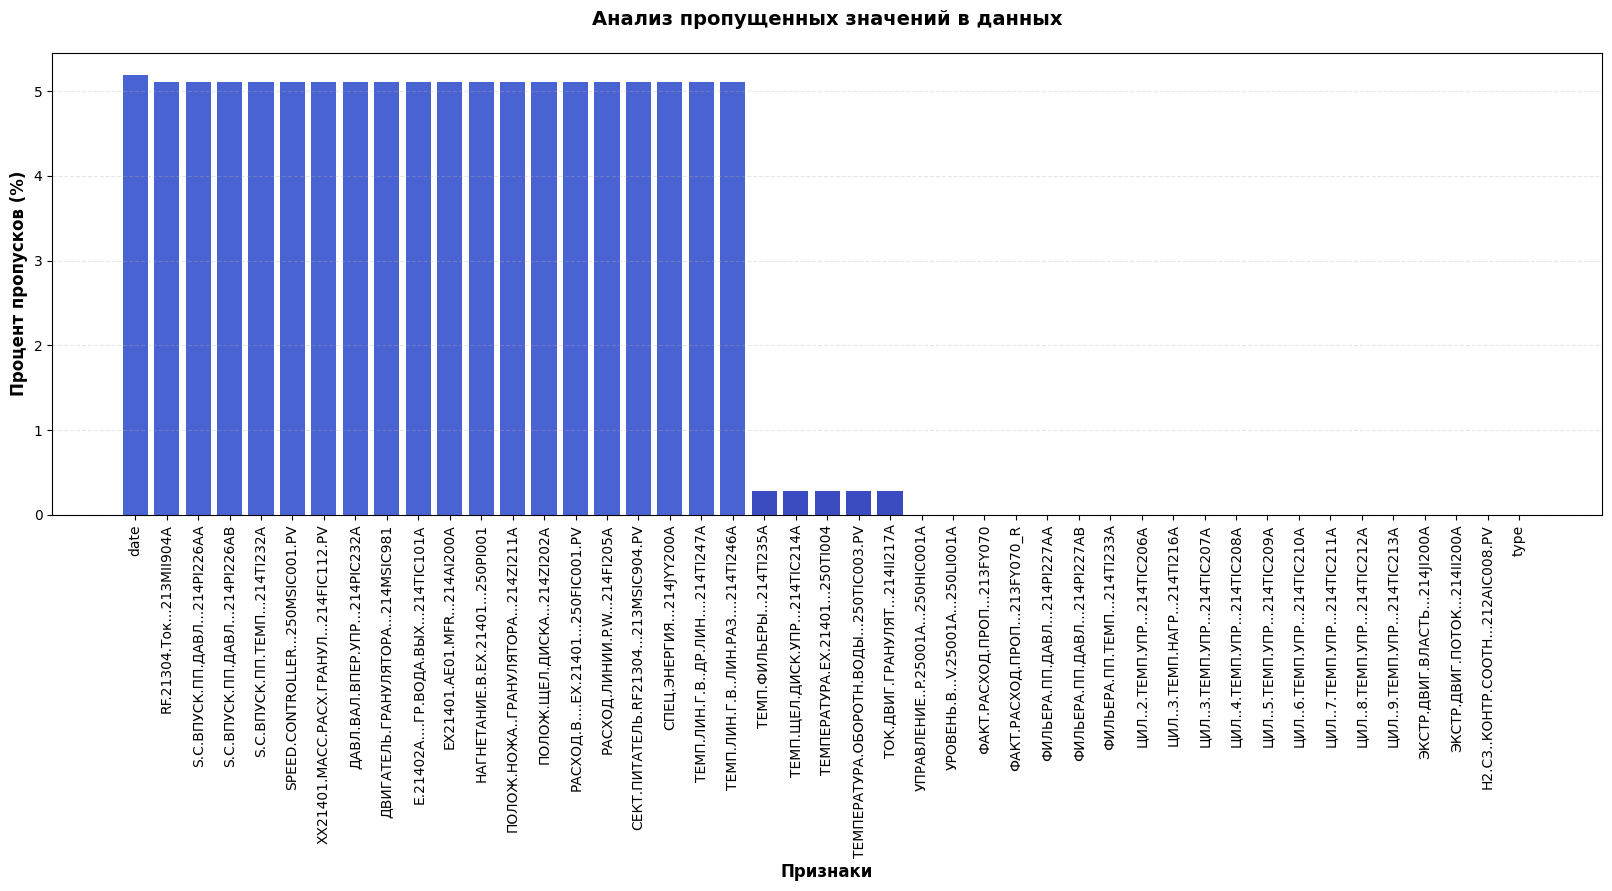

In [203]:
missing_stats = result.isnull().sum().sort_values(ascending=False)
missing_percent = missing_stats / len(result) * 100
plt.figure(figsize=(20, 6))
plt.bar(result.columns, missing_percent, color=plt.cm.coolwarm(missing_percent/100))
plt.ylabel('Процент пропусков (%)', fontsize=12, fontweight='bold')
plt.xlabel('Признаки', fontsize=12, fontweight='bold')
plt.title('Анализ пропущенных значений в данных', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=90);

Проверим, в каких местах датасета были остановки:

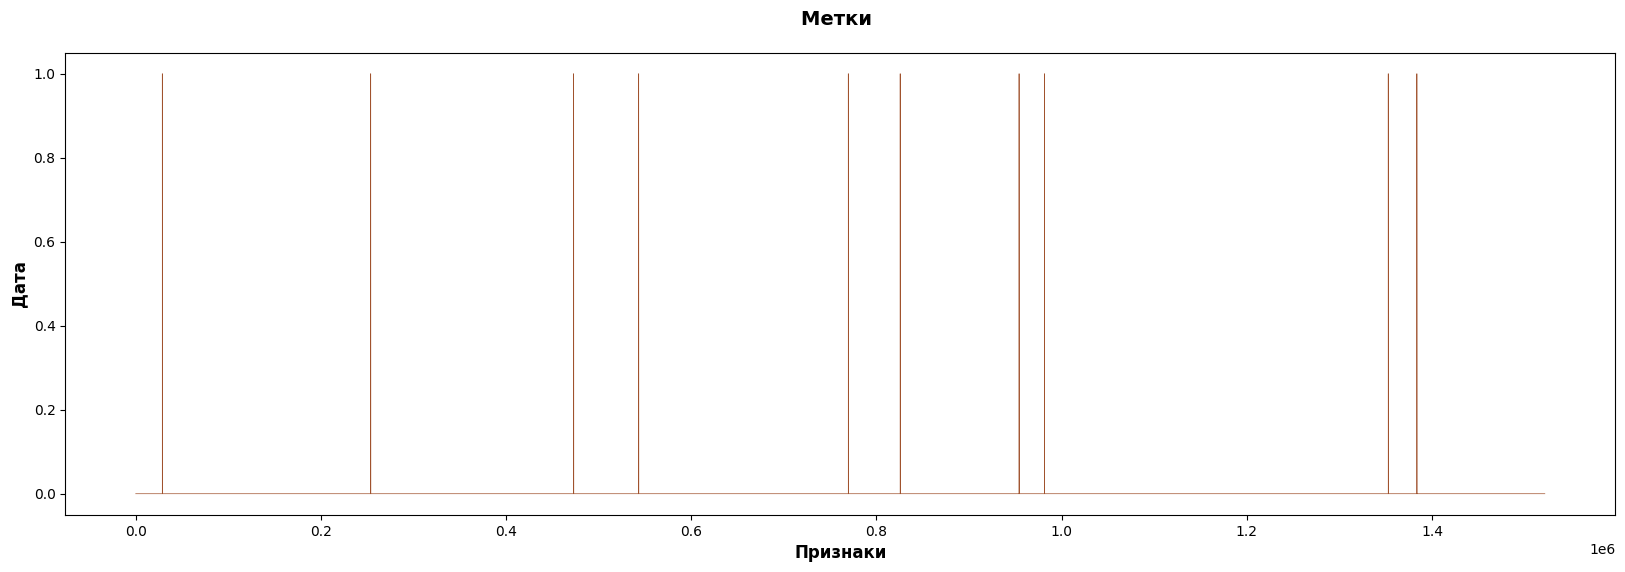

In [204]:
plt.figure(figsize=(20, 6))
plt.plot(result.type.values, color='sienna', linewidth=0.5)
plt.title('Метки ', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Признаки', fontsize=12, fontweight='bold')
plt.ylabel('Дата', fontsize=12, fontweight='bold');


In [205]:
# алгоритм для поиска индекса меток с остановкой
n = 0
for i in result.type.values:
    n += 1
    if i == 1: print(n)

28710
253746
472950
543168
769572
825618
954012
981306
1352712
1383606


Пропуски в данных локализованы в начальном сегменте временного ряда (до записи 79 000), что составляет **5,3%** данных. Поскольку данный интервал содержит одну из целевых меток остановок, обрезка датасета была признана нецелесообразной во избежание потери значимой информации.

## 1.4. Балансировка классов

Для уменьшения дисбаланса классов стоит сделать расширение предотказного окна.

In [206]:
result.groupby(result.type).type.count()

type
0.0    1521788
1.0         10
Name: type, dtype: int64

In [207]:
# распределение классов:
print(f"Баланс классов: {result.type.mean() * 100:.3f}% положительных")

Баланс классов: 0.001% положительных


In [208]:

result_temp = result.set_index('date')
result['target'] = result_temp.type.rolling('30min', min_periods=1).max().shift(1).fillna(0).values
result = result.drop("type",axis=1)

print(f"Баланс классов: {result.target.mean() * 100:.3f}% положительных")

Баланс классов: 0.118% положительных


In [209]:
result.shape

(1521798, 45)

Обоснование выбора горизонта прогнозирования: 30-минутный интервал был выбран на основе экспертной оценки инженеров-технологов как достаточный для:

1. Обнаружения предотказных состояний
2. Принятия превентивных мер
3. Минимизации ложных срабатываний

Вывод: Полученное распределение классов (0.118% положительных) является типичным для задач прогнозного обслуживания и отражает реальную частоту возникновения отказов в промышленном оборудовании.

## 1.5. Корреляционный анализ признаков

## 1.6. Агрегация временных рядов с созданием статистических признаков

1. Создание новых признаков из исходных

Из каждого исходного столбца создается 4 новых признака
Исходные: col1, col2, ..., target
Новые: col1_max, col1_min, col1_mean, col1_std, ..., target_max

2. Изменение временного разрешения

Исходный ряд ресемплируется с интервалом 10 минут
Это downsampling (понижение частоты дискретизации)
Уменьшает размерность данных и шум

3. Агрегация статистиками

Используются различные агрегирующие функции:

max() — максимальное значение за 10 минут</br>
min() — минимальное значение за 10 минут</br>
mean() — среднее значение за 10 минут</br>
std() — стандартное отклонение за 10 минут</br>

In [210]:
result = result.set_index('date').sort_index()

In [211]:
df1 = result.resample("10Min").max()
df1.columns = result.columns + "_max"
df2 = result.resample("10Min").min()
df2.columns = result.columns + "_min"
df3 = result.resample("10Min").mean()
df3.columns = result.columns + "_mean"
df4 = result.resample("10Min").std()
df4.columns = result.columns + "_std"
df = pd.concat([df1,df2,df3,df4],axis=1)

In [212]:
df = df.drop(["target_min","target_mean","target_std"],axis=1)
df = df.rename(columns={'target_max': 'target'})
df = df.fillna(-1)
df["target"] = df["target"].shift(-3, fill_value=0)

In [227]:
missing_stats = df.isnull().sum().sort_values(ascending=False)
missing_percent = missing_stats / len(df) * 100
n = 0
for i in missing_percent:
    if i > 0: 
        n += 1
if n > 0:
    print("Есть пропуски")
else: 
    print("Нет пропусков")

Нет пропусков


Результаты анализа полноты данных после агрегации показали отсутствие пропущенных значений во всех признаках. Это свидетельствует о том, что процедура ресемплинга с применением статистических агрегирующих функций (max, min, mean, std) эффективно устранила проблему неполноты данных, присутствовавшую в исходном временном ряде.